### Different method for highlighting Zipf's law  
  
Scatter plots on log-log scale are often used to demonstrate the degree to which a data set follows Zipf's law. This workbook demonstrates a method for building that type of plot, based on code taken from [here](https://stats.stackexchange.com/questions/331219/characterizing-fitting-word-count-data-into-zipf-power-law-lognormal)

In [1]:
import custom_embedding_functions as embed
import re
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simonhodgkinson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Import full datasets without adjustments for now, ie include both punctuation and stop words

text_data = ['Female_Authors']
full_text = [0]*len(text_data)
vocab_size = [0]*len(text_data)

for n in range(len(text_data)):
    clean = ''
    with open('./Data/'+text_data[n]+'.txt', 'r') as file:
        clean += file.read().lower()
        clean = re.sub("[^a-z]"," ",clean) # take out punctuation and numbers
        print('\n'+text_data[n]+': ')
        # Use our custom tokenization function to process the text and return basic information
        full_text[n], vocab_size[n] = embed.tokenize(clean, exclude_stopwords=False)


Female_Authors: 
Document contains  44607 distinct words
Total word count =  3826139


      fun: 153058.08776107652
 hess_inv: array([[7.27508061e-06]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([1.35713498])


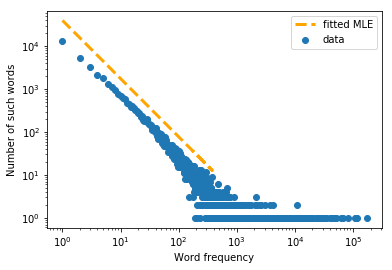

In [3]:
counter_of_words = Counter(full_text[0])
counter_of_counts = Counter(counter_of_words.values())

# Sort data
counter_of_counts = sorted(counter_of_counts.items(), key=lambda pair: pair[1], reverse=True)
word_counts = np.asarray(counter_of_counts)[:,0]
freq_of_word_counts = np.asarray(counter_of_counts)[:,1]


f,ax = plt.subplots()
ax.scatter(word_counts, freq_of_word_counts, label = "data")
ax.set_xlabel('Word frequency')
ax.set_ylabel('Number of such words')
ax.set_xscale("log")
ax.set_yscale("log")



def loglik(b):  
    # Power law function
    Probabilities = word_counts**(-b)

    # Normalized
    Probabilities = Probabilities/Probabilities.sum()

    # Log Likelihoood
    Lvector = np.log(Probabilities)

    # Multiply the vector by frequencies
    Lvector = np.log(Probabilities) * freq_of_word_counts

    # LL is the sum
    L = Lvector.sum()

    # We want to maximize LogLikelihood or minimize (-1)*LogLikelihood
    return(-L)

s_best = optimize.minimize(loglik, [1])
print(s_best)
ax.plot(word_counts[0:2*10**2], 4*10**4*word_counts[0:2*10**2]**-s_best.x, '--', color="orange", lw=3, label = "fitted MLE")
ax.legend()